In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
import seaborn as sns
import smogn
from sklearn.preprocessing import LabelEncoder


# 讀取 Excel 表
df1 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11204.xlsx')
df2 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11301.xlsx')
df3 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11302.xlsx')
df4 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11303.xlsx')


# 合併 DataFrame
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# 顯示合併後的 DataFrame
print(df)

                   /預售屋/土地位置建物門牌  /預售屋/土地移轉總面積平方公尺  /預售屋/土地移轉總面積平方公尺/#agg  \
0                     臺中市北屯區祥順一街            105.70                 105.70   
1      臺中市新社區水底寮段上水底寮小段213地號等18筆            113.73                 113.73   
2              臺中市豐原區鎌村路107巷102弄             20.89                  20.89   
3              臺中市豐原區鎌村路107巷102弄             20.74                  20.74   
4                      臺中市梧棲區中華路             24.02                  24.02   
...                          ...               ...                    ...   
29106          臺中市太平區東平段191-12地號             79.73                  79.73   
29107          臺中市太平區東平段191-13地號             82.44                  82.44   
29108             臺中市西屯區惠民段114地號              9.58                   9.58   
29109             臺中市西屯區惠民段114地號              9.58                   9.58   
29110             臺中市西屯區惠民段114地號              6.73                   6.73   

      /預售屋/主要用途 /預售屋/主要建材  /預售屋/交易年月日  /預售屋/交易年月日/#agg /預售屋/交易筆棟數  \
0     

In [74]:
df.drop(columns=['/預售屋/土地移轉總面積平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/交易年月日/#agg'], inplace=True)
df.drop(columns=['/預售屋/單價元平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/總價元/#agg'], inplace=True)
df.drop(columns=['/預售屋/總樓層數/#agg'], inplace=True)
df.drop(columns=['/預售屋/車位移轉總面積平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/車位總價元/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物現況格局-房/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物現況格局-廳/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物現況格局-衛/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物移轉總面積平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/土地位置建物門牌'], inplace=True)
df.drop(columns=['/預售屋/有無管理組織'], inplace=True)
df.drop(columns=['/預售屋/棟及號'], inplace=True)
df.drop(columns=['/預售屋/解約情形'], inplace=True)
df.drop(columns=['/預售屋/編號'], inplace=True)
df.drop(columns=['/預售屋/建案名稱'], inplace=True)
df.drop(columns=['/預售屋/建築完成年月'], inplace=True)
df.drop(columns=['/預售屋/備註'], inplace=True)
df.drop(columns=['/預售屋/非都市土地使用分區'], inplace=True)
df.drop(columns=['/預售屋/非都市土地使用編定'], inplace=True)
df.drop(columns=['/預售屋/交易年月日'], inplace=True)

In [75]:
# 檢查缺失值
missing_values = df.isnull().sum()

# 顯示有缺失值的欄位
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

/預售屋/車位類別        2455
/預售屋/都市土地使用分區    1273
/預售屋/單價元平方公尺       10
/預售屋/鄉鎮市區          11
dtype: int64


In [76]:
# 刪除目標變數缺失值的10筆記錄
df = df.dropna(subset=["/預售屋/單價元平方公尺"])

# 將缺失值填入 "0" 表示無車位
df["/預售屋/車位類別"] = df["/預售屋/車位類別"].fillna("0")

# 以眾數填入缺失值
mode_value = df["/預售屋/都市土地使用分區"].mode()[0]
df["/預售屋/都市土地使用分區"] = df["/預售屋/都市土地使用分區"].fillna(mode_value)

# 刪除/預售屋/鄉鎮市區的缺失11筆記錄
df = df.dropna(subset=["/預售屋/鄉鎮市區"])

In [77]:
# 檢查缺失值
missing_values = df.isnull().sum()

# 顯示有缺失值的欄位
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [78]:
df.drop(columns=['/預售屋/總價元'], inplace=True)

In [79]:
# 定義中英對應字典
column_name_map = {
    '/預售屋/土地移轉總面積平方公尺': 'Land Transfer Area (sqm)',
    '/預售屋/主要用途': 'Main Use',
    '/預售屋/主要建材': 'Main Materials',
    '/預售屋/交易筆棟數': 'Transaction Volume',
    '/預售屋/交易標的': 'Transaction Target',
    '/預售屋/車位移轉總面積平方公尺': 'Parking Transfer Area (sqm)',
    '/預售屋/車位總價元': 'Parking Price',
    '/預售屋/車位類別': 'Parking Type',
    '/預售屋/建物型態': 'Building Type',
    '/預售屋/建物現況格局-房': 'House Layout - Room',
    '/預售屋/建物現況格局-隔間': 'House Layout - Partition',
    '/預售屋/建物現況格局-衛': 'House Layout - Bathroom',
    '/預售屋/建物現況格局-廳': 'House Layout - Living Room',
    '/預售屋/建物移轉總面積平方公尺': 'Building Transfer Area (sqm)',
    '/預售屋/移轉層次': 'Transfer Level',
    '/預售屋/都市土地使用分區': 'Urban Land Use Zone',
    '/預售屋/單價元平方公尺': 'Unit Price (per sqm)',
    '/預售屋/鄉鎮市區': 'Township/District',
    '/預售屋/總樓層數': 'Total Floors'
}
df.rename(columns=column_name_map, inplace=True)

In [80]:
# 顯示更新後的列名
print(df.columns)

Index(['Land Transfer Area (sqm)', 'Main Use', 'Main Materials',
       'Transaction Volume', 'Transaction Target',
       'Parking Transfer Area (sqm)', 'Parking Price', 'Parking Type',
       'Building Type', 'House Layout - Room', 'House Layout - Partition',
       'House Layout - Bathroom', 'House Layout - Living Room',
       'Building Transfer Area (sqm)', 'Transfer Level', 'Urban Land Use Zone',
       'Unit Price (per sqm)', 'Township/District', 'Total Floors'],
      dtype='object')


In [81]:
# 對'Unit Price (per sqm)' 進行對數轉換
df['Unit Price (per sqm)'] = df['Unit Price (per sqm)'].apply(lambda x: np.log(x))

In [82]:
# 定義特徵和目標變數
X = df.drop(columns=['Unit Price (per sqm)'])  # 將目標變數從特徵集中移除
y = df['Unit Price (per sqm)']                # 定義目標變數

# 切割數據集，80% 用於訓練，20% 用於測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 LabelEncoder
label_encoder = LabelEncoder()

# 1. 標籤編碼（修正未知類別處理）
categorical_features = [
    "Main Use",
    "Main Materials",
    "Transaction Target",
    "House Layout - Partition",
    "Urban Land Use Zone"
]
# 標籤編碼
for feature in categorical_features:
    # 對訓練集進行標籤編碼
    X_train[f"{feature}_encoded"] = label_encoder.fit_transform(X_train[feature].copy())
    # 測試集應用相同的映射，對未見過的類別填補為 1
    label_mapping = {label: idx for idx, label in enumerate(label_encoder.classes_)}
    X_test[f"{feature}_encoded"] = X_test[feature].map(label_mapping).fillna(1)

# 2. 頻率編碼
frequency_features = [
    "Transaction Volume",
    "Building Type", 
    "Transfer Level"
]

for feature in frequency_features:
    # 計算頻率映射表
    freq_map = X_train[feature].value_counts(normalize=True)
    # 對訓練集應用頻率映射
    X_train[f"{feature}_freq"] = X_train[feature].map(freq_map).fillna(1)  # 填補為 1
    # 對測試集應用頻率映射，對未知值填補為 1
    X_test[f"{feature}_freq"] = X_test[feature].map(freq_map).fillna(1)  # 填補為 1

# 將 y_train 暫時加入到 X_train，以便進行目標編碼
X_train['Unit Price (per sqm)'] = y_train

# 目標編碼
target_encoding_features = [
    ("Parking Type", X_train["Parking Price"]),
    ("Township/District", X_train["Unit Price (per sqm)"])  # 使用目標變數進行編碼
]

for feature, target in target_encoding_features:
    # 計算基於目標值的目標編碼均值
    target_map = X_train.groupby(feature)[target.name].mean()
    # 對訓練集進行目標編碼
    X_train[f"{feature}_encoded"] = X_train[feature].map(target_map)
    # 測試集目標編碼，對未知值填補為目標值的全體均值
    X_test[f"{feature}_encoded"] = X_test[feature].map(target_map).fillna(target.mean())

# 移除暫時加入的目標變數，避免資料洩漏
X_train = X_train.drop(columns=["Unit Price (per sqm)"])

# 移除原始特徵以避免資料洩漏
X_train = X_train.drop(columns=categorical_features + frequency_features)
X_test = X_test.drop(columns=categorical_features + frequency_features)

In [83]:
X_train

,Land Transfer Area (sqm),Parking Transfer Area (sqm),Parking Price,Parking Type,House Layout - Room,House Layout - Bathroom,House Layout - Living Room,Building Transfer Area (sqm),Township/District,Total Floors,Main Use_encoded,Main Materials_encoded,Transaction Target_encoded,House Layout - Partition_encoded,Urban Land Use Zone_encoded,Transaction Volume_freq,Building Type_freq,Transfer Level_freq,Parking Type_encoded,Township/District_encoded
9311,26.11,72.98,3300000,坡道平面,3,2,1,165.62,大肚區,15,1,2,1,0,0,0.091569,0.810373,0.053283,2.389501e+06,11.497503
17627,50.22,61.40,4000000,坡道平面,3,2,2,238.58,北屯區,19,1,2,1,0,0,0.091569,0.810373,0.063768,2.389501e+06,12.007290
90,11.49,34.50,2400000,坡道平面,3,2,2,166.42,北區,28,1,2,1,0,2,0.006746,0.810373,0.015211,2.389501e+06,12.064227
11881,17.79,23.79,500000,坡道機械,2,2,2,119.67,龍井區,13,1,2,1,0,0,0.102827,0.810373,0.050232,1.084311e+06,11.498559
27960,16.33,36.63,1850000,坡道平面,3,2,2,163.07,太平區,15,1,2,1,0,2,0.551306,0.810373,0.044775,2.389501e+06,11.649040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,151.17,0.00,0,0,3,4,2,266.37,北屯區,4,1,2,0,0,0,0.004211,0.054357,0.054916,0.000000e+00,12.007290
5398,62.81,0.00,0,0,4,3,2,140.08,沙鹿區,3,1,2,0,0,0,0.012289,0.054357,0.054916,0.000000e+00,11.590554
862,14.49,52.26,4700000,坡道平面,3,2,2,250.46,西屯區,28,1,5,1,0,2,0.023032,0.810373,0.015727,2.389501e+06,12.270828
15808,26.58,26.01,1850000,坡道平面,3,2,2,157.07,太平區,15,0,2,1,0,0,0.551306,0.810373,0.044775,2.389501e+06,11.649040


In [84]:
X_train.drop(columns=['Parking Type'], inplace=True)
X_train.drop(columns=['Township/District'], inplace=True)

X_test.drop(columns=['Parking Type'], inplace=True)
X_test.drop(columns=['Township/District'], inplace=True)

In [85]:
X_test

,Land Transfer Area (sqm),Parking Transfer Area (sqm),Parking Price,House Layout - Room,House Layout - Bathroom,House Layout - Living Room,Building Transfer Area (sqm),Total Floors,Main Use_encoded,Main Materials_encoded,Transaction Target_encoded,House Layout - Partition_encoded,Urban Land Use Zone_encoded,Transaction Volume_freq,Building Type_freq,Transfer Level_freq,Parking Type_encoded,Township/District_encoded
16794,9.99,27.80,1800000,2,1,2,108.08,24,1,2,1,0,2,0.551306,0.810373,0.053283,2.389501e+06,11.728561
3230,14.70,27.30,1600000,3,2,2,144.20,28,1,2,1,0,2,0.551306,0.810373,0.054873,2.389501e+06,11.728561
2248,15.98,34.45,2000000,2,2,2,138.07,15,1,2,1,0,0,0.551306,0.810373,0.015727,2.389501e+06,12.007290
3180,14.09,27.30,1600000,3,2,2,139.45,28,1,2,1,0,2,0.551306,0.810373,0.013836,2.389501e+06,11.728561
6489,7.38,28.96,2050000,2,1,2,112.38,34,1,5,1,0,2,0.551306,0.810373,0.017575,2.389501e+06,12.270828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23135,66.18,25.18,2400000,4,3,2,255.91,27,1,2,1,0,0,0.551306,0.810373,0.069182,2.389501e+06,12.007290
1561,22.09,26.50,2200000,2,2,2,114.53,14,1,2,1,0,0,0.004254,0.810373,0.044775,2.389501e+06,12.007290
15461,31.35,26.50,2300000,3,2,2,151.43,14,1,2,1,0,0,0.002836,0.810373,0.069998,2.389501e+06,12.007290
24214,6.33,29.75,2250000,0,0,0,89.48,26,2,2,1,1,2,0.102827,0.020067,0.069182,2.389501e+06,12.270828


In [86]:
X_train

,Land Transfer Area (sqm),Parking Transfer Area (sqm),Parking Price,House Layout - Room,House Layout - Bathroom,House Layout - Living Room,Building Transfer Area (sqm),Total Floors,Main Use_encoded,Main Materials_encoded,Transaction Target_encoded,House Layout - Partition_encoded,Urban Land Use Zone_encoded,Transaction Volume_freq,Building Type_freq,Transfer Level_freq,Parking Type_encoded,Township/District_encoded
9311,26.11,72.98,3300000,3,2,1,165.62,15,1,2,1,0,0,0.091569,0.810373,0.053283,2.389501e+06,11.497503
17627,50.22,61.40,4000000,3,2,2,238.58,19,1,2,1,0,0,0.091569,0.810373,0.063768,2.389501e+06,12.007290
90,11.49,34.50,2400000,3,2,2,166.42,28,1,2,1,0,2,0.006746,0.810373,0.015211,2.389501e+06,12.064227
11881,17.79,23.79,500000,2,2,2,119.67,13,1,2,1,0,0,0.102827,0.810373,0.050232,1.084311e+06,11.498559
27960,16.33,36.63,1850000,3,2,2,163.07,15,1,2,1,0,2,0.551306,0.810373,0.044775,2.389501e+06,11.649040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,151.17,0.00,0,3,4,2,266.37,4,1,2,0,0,0,0.004211,0.054357,0.054916,0.000000e+00,12.007290
5398,62.81,0.00,0,4,3,2,140.08,3,1,2,0,0,0,0.012289,0.054357,0.054916,0.000000e+00,11.590554
862,14.49,52.26,4700000,3,2,2,250.46,28,1,5,1,0,2,0.023032,0.810373,0.015727,2.389501e+06,12.270828
15808,26.58,26.01,1850000,3,2,2,157.07,15,0,2,1,0,0,0.551306,0.810373,0.044775,2.389501e+06,11.649040


In [79]:
# 輸出 DataFrame 到 Excel 檔案
#X_train.to_excel("processed_data.xlsx", index=False)

訓練集 R²：0.9901
訓練集 Ra²：0.9901
測試集 R²：0.9614
測試集 Ra²：0.9614


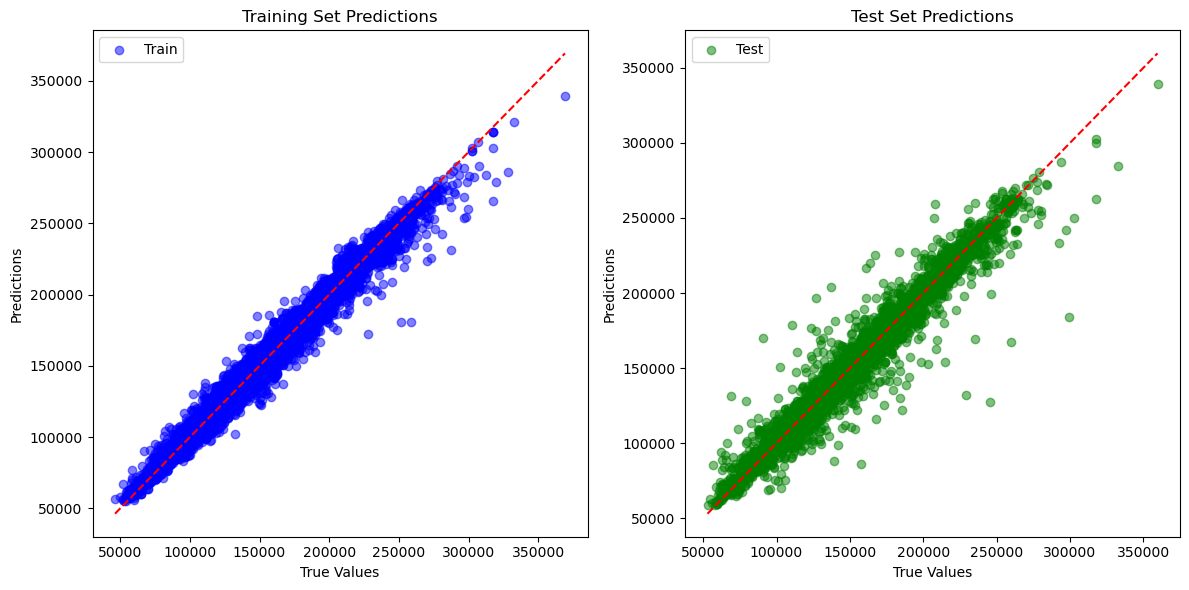

In [86]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 定義前五個重要特徵
important_features = [
    'Township/District_freq',  # 重要性：0.630906
    'Parking Price',           # 重要性：0.165049
    'Total Floors',            # 重要性：0.057787
    'Land Transfer Area (sqm)', # 重要性：0.035245
    'Building Transfer Area (sqm)' # 重要性：0.022468
]

# 使用這些特徵作為 X
X_train_subset = X_train[important_features]
X_test_subset = X_test[important_features]

# 創建並訓練隨機森林回歸模型
model = RandomForestRegressor(random_state=42)
model.fit(X_train_subset, y_train)

# 預測
y_train_pred = model.predict(X_train_subset)
y_test_pred = model.predict(X_test_subset)

# 計算 R^2 分數
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 計算調整後的 R²
n_train = X_train_subset.shape[0]  # 訓練集樣本數
n_test = X_test_subset.shape[0]    # 測試集樣本數
p = X_train_subset.shape[1]        # 特徵數

train_ra2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_ra2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

# 顯示結果
print(f"訓練集 R²：{train_r2:.4f}")
print(f"訓練集 Ra²：{train_ra2:.4f}")
print(f"測試集 R²：{test_r2:.4f}")
print(f"測試集 Ra²：{test_ra2:.4f}")

# 視覺化預測結果
plt.figure(figsize=(12, 6))

# 訓練集對比
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue', label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Training Set Predictions')
plt.legend()

# 測試集對比
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Test Set Predictions')
plt.legend()

plt.tight_layout()
plt.show()

                        Feature  Positive Contributions  \
0        Township/District_freq                    1918   
1                 Parking Price                    2480   
2                  Total Floors                    1738   
3      Land Transfer Area (sqm)                    2199   
4  Building Transfer Area (sqm)                    2234   

   Negative Contributions  Mean SHAP Value  Max SHAP Value  Min SHAP Value  
0                    2737      -458.736436    86613.311856   -57406.436234  
1                    2175       755.314484    71265.779633   -33399.185422  
2                    2917     -1463.985398    32789.720983   -52640.501453  
3                    2456       -32.970113    37138.799003   -18905.366646  
4                    2421       940.428470    39261.718062   -16684.165598  


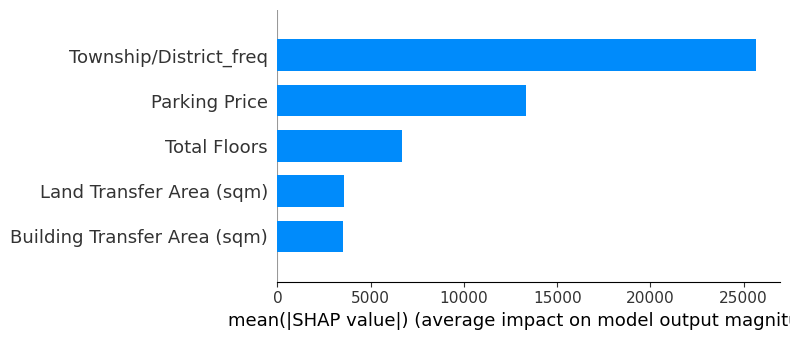

In [88]:
import shap
import pandas as pd
import numpy as np

# 創建 SHAP 解釋器
explainer = shap.TreeExplainer(model)

# 計算 SHAP 值
shap_values = explainer.shap_values(X_val_subset)

# 只選擇目標特徵的 SHAP 值
shap_values_target = pd.DataFrame(shap_values, columns=X_val_subset.columns)[target_features]

# 儲存正向與負向貢獻的結果
contribution_summary = []

# 計算每個特徵的正負向貢獻度
for feature in target_features:
    feature_shap = shap_values_target[feature]
    positive_contrib = np.sum(feature_shap > 0)
    negative_contrib = np.sum(feature_shap < 0)
    mean_shap = feature_shap.mean()
    max_shap = feature_shap.max()
    min_shap = feature_shap.min()

    # 儲存結果到 summary 中
    contribution_summary.append({
        "Feature": feature,
        "Positive Contributions": positive_contrib,
        "Negative Contributions": negative_contrib,
        "Mean SHAP Value": mean_shap,
        "Max SHAP Value": max_shap,
        "Min SHAP Value": min_shap
    })

# 將結果轉為 DataFrame 以方便檢視
summary_df = pd.DataFrame(contribution_summary)

# 顯示五個特徵的貢獻總覽
print(summary_df)

# 繪製 SHAP 條形圖，顯示五個特徵的平均貢獻
shap.summary_plot(shap_values_target.values, X_val_subset[target_features], plot_type="bar")

In [89]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# 假設這些是前五個重要特徵
important_features = [
    'Township/District_freq', 
    'Parking Price', 
    'Total Floors', 
    'Land Transfer Area (sqm)', 
    'Building Transfer Area (sqm)'
]

# 提取重要特徵
X_subset = X_train[important_features]

# 初始化隨機森林回歸模型，使用最佳參數
best_params = {
    'n_estimators': 200, 
    'max_depth': 10, 
    'min_samples_split': 2, 
    'min_samples_leaf': 5, 
    'random_state': 42
}
rf_model = RandomForestRegressor(**best_params)

# 手動進行交叉驗證
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
ra2_scores = []

p = X_subset.shape[1]  # 特徵數

for train_index, val_index in kf.split(X_subset):
    X_train_fold, X_val_fold = X_subset.iloc[train_index], X_subset.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # 訓練模型
    rf_model.fit(X_train_fold, y_train_fold)
    
    # 預測
    y_val_pred = rf_model.predict(X_val_fold)
    
    # 計算 R^2
    r2 = r2_score(y_val_fold, y_val_pred)
    r2_scores.append(r2)
    
    # 計算調整後的 Ra^2
    n_val = X_val_fold.shape[0]  # 驗證集樣本數
    ra2 = 1 - (1 - r2) * (n_val - 1) / (n_val - p - 1)
    ra2_scores.append(ra2)

# 輸出結果
print("Cross-validation R^2 scores:", r2_scores)
print("Mean cross-validation R^2 score:", np.mean(r2_scores))
print("Cross-validation Ra^2 scores:", ra2_scores)
print("Mean cross-validation Ra^2 score:", np.mean(ra2_scores))


Cross-validation R^2 scores: [0.9227390980496878, 0.922290281973079, 0.9216264150978939, 0.9190827235455525, 0.9180428679012714]
Mean cross-validation R^2 score: 0.9207562773134971
Cross-validation Ra^2 scores: [0.9226560039413308, 0.9222067051629834, 0.9215421061640491, 0.9189956782825852, 0.9179547040328347]
Mean cross-validation Ra^2 score: 0.9206710395167568


訓練集 R²：0.9900
訓練集調整後 R²：0.9900
測試集 R²：0.9626
測試集調整後 R²：0.9625


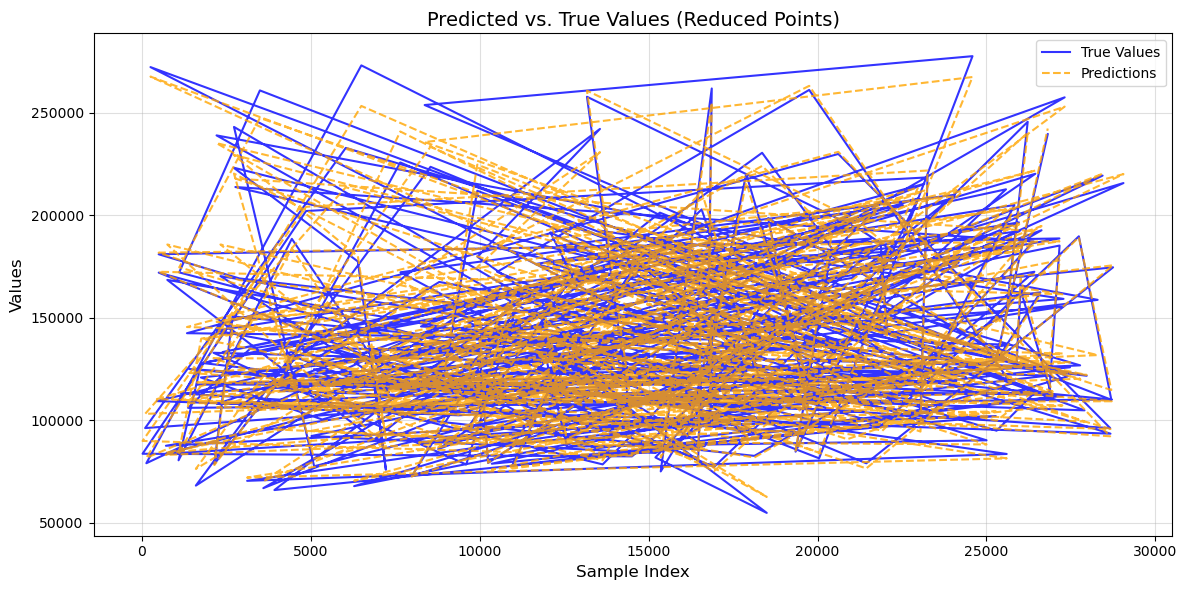

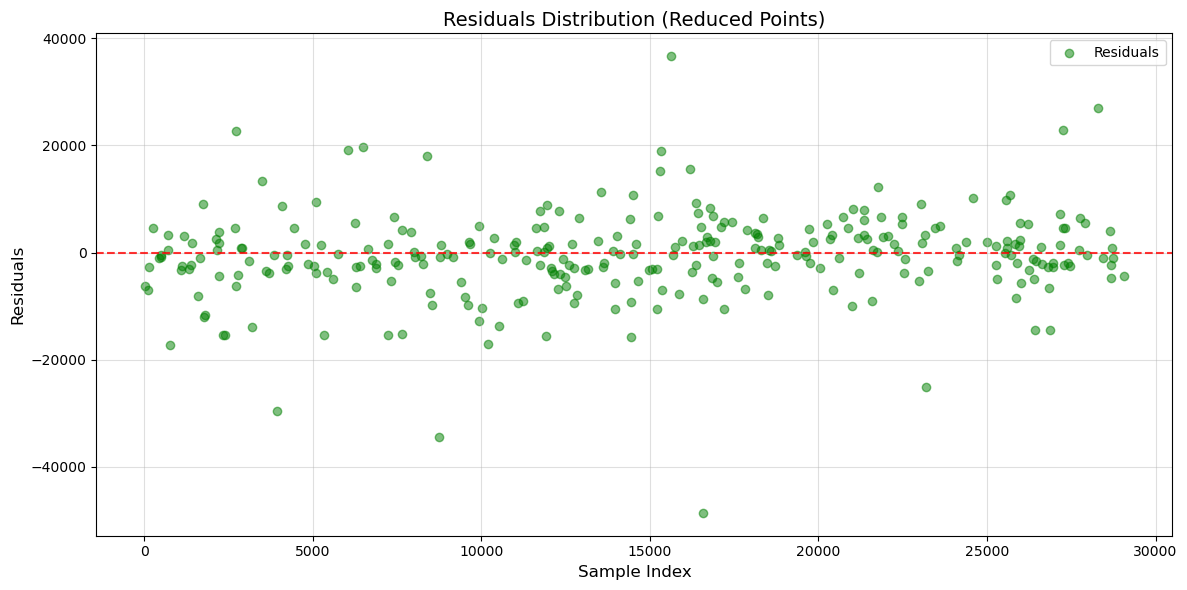

In [93]:
import pandas as pd
import itertools
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 指定使用的特徵
selected_features = [
    'Township/District_freq',  
    'Parking Price',           
    'Total Floors',            
    'Land Transfer Area (sqm)', 
    'Building Transfer Area (sqm)'
]

# 創建包含交互項和平方項的新數據集
def add_interaction_and_squared_terms(X, features):
    X_new = X[features].copy()
    # 生成交互作用項
    for feature1, feature2 in itertools.combinations(features, 2):
        interaction_term = f'{feature1}_{feature2}_interaction'
        X_new[interaction_term] = X[feature1] * X[feature2]
    # 生成平方項
    for feature in features:
        squared_term = f'{feature}_squared'
        X_new[squared_term] = X[feature] ** 2
    return X_new

# 添加特徵
X_train_new = add_interaction_and_squared_terms(X_train, selected_features)
X_test_new = add_interaction_and_squared_terms(X_test, selected_features)

# 創建並訓練隨機森林模型
model = RandomForestRegressor(random_state=42)
model.fit(X_train_new, y_train)

# 預測結果
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)

# 計算 R² 和調整後的 R²
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_ra2 = adjusted_r2(train_r2, X_train_new.shape[0], X_train_new.shape[1])
test_ra2 = adjusted_r2(test_r2, X_test_new.shape[0], X_test_new.shape[1])

# 顯示結果
print(f"訓練集 R²：{train_r2:.4f}")
print(f"訓練集調整後 R²：{train_ra2:.4f}")
print(f"測試集 R²：{test_r2:.4f}")
print(f"測試集調整後 R²：{test_ra2:.4f}")

# 降采樣數據，避免折線圖過於密集
sample_size = 300
indices = np.linspace(0, len(y_test) - 1, sample_size, dtype=int)

y_test_sample = y_test.iloc[indices]
y_test_pred_sample = y_test_pred[indices]

# 繪製降采樣後的折線圖
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample.index, y_test_sample, label="True Values", color="blue", linewidth=1.5, alpha=0.8)
plt.plot(y_test_sample.index, y_test_pred_sample, label="Predictions", color="orange", linestyle='--', linewidth=1.5, alpha=0.8)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Predicted vs. True Values (Reduced Points)", fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# 繪製殘差圖
plt.figure(figsize=(12, 6))
residuals = y_test_sample - y_test_pred_sample
plt.scatter(y_test_sample.index, residuals, alpha=0.5, color="green", label="Residuals")
plt.axhline(0, color="red", linestyle="--", linewidth=1.5, alpha=0.8)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residuals Distribution (Reduced Points)", fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

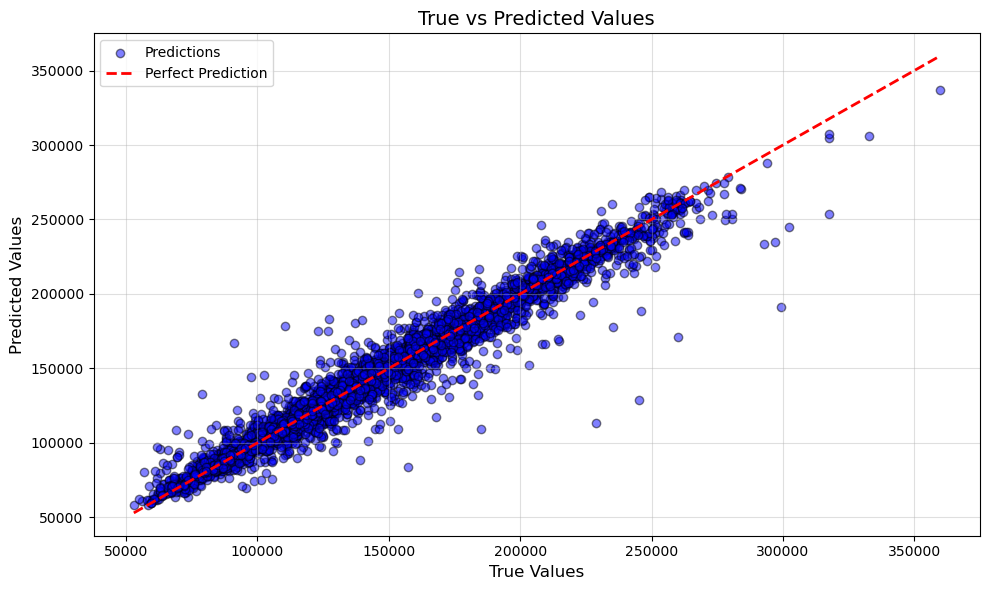

In [94]:
# 散點圖：真實值 vs. 預測值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color="blue", edgecolors="k", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.xlabel("True Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("True vs Predicted Values", fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

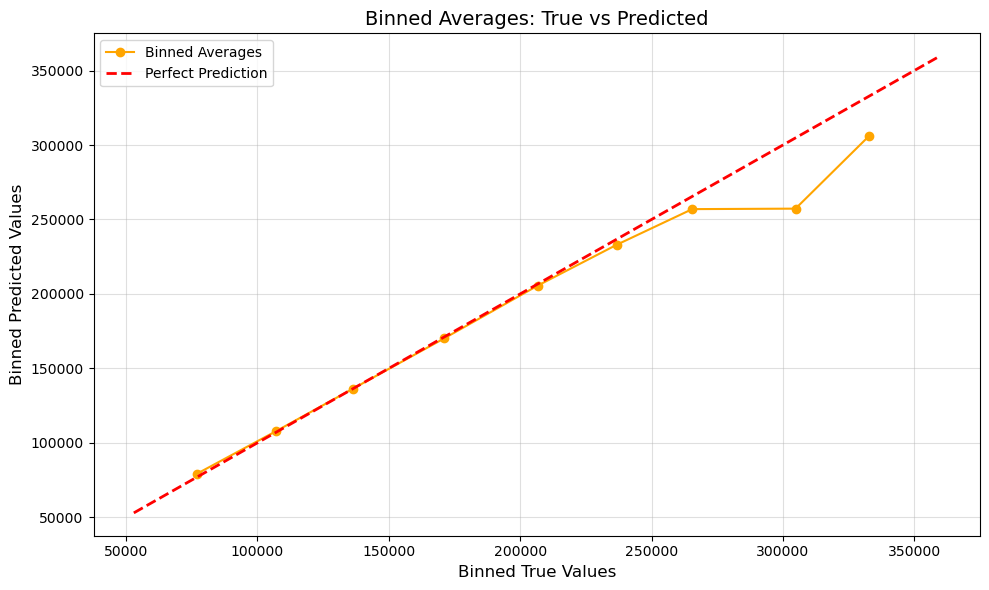

In [95]:
# 分箱並計算平均值
bins = np.linspace(y_test.min(), y_test.max(), 10)
digitized = np.digitize(y_test, bins)
bin_means_true = [y_test[digitized == i].mean() for i in range(1, len(bins))]
bin_means_pred = [y_test_pred[digitized == i].mean() for i in range(1, len(bins))]

# 繪製分箱平均圖
plt.figure(figsize=(10, 6))
plt.plot(bin_means_true, bin_means_pred, 'o-', color="orange", label="Binned Averages")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.xlabel("Binned True Values", fontsize=12)
plt.ylabel("Binned Predicted Values", fontsize=12)
plt.title("Binned Averages: True vs Predicted", fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

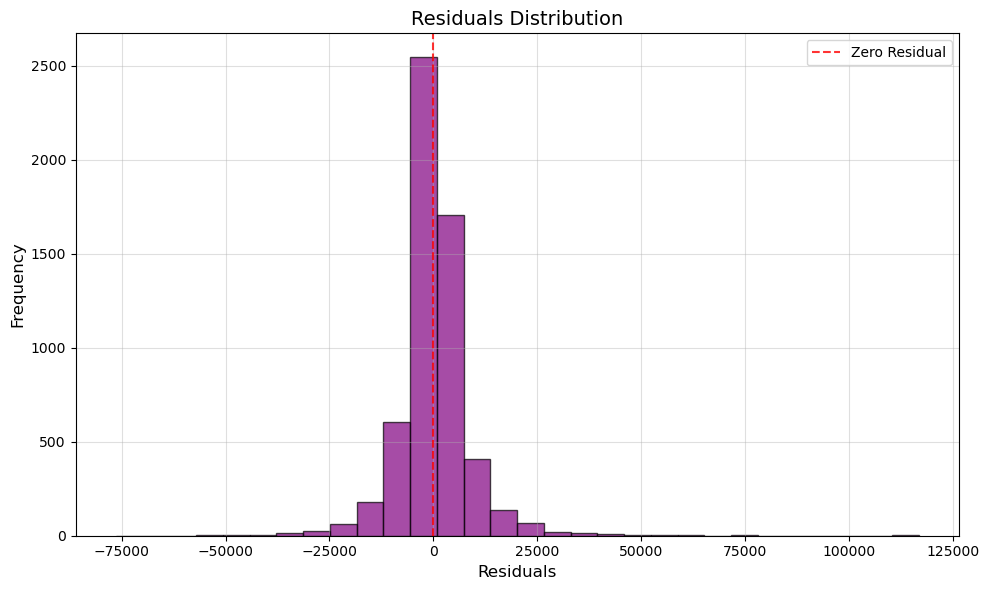

In [96]:
# 計算殘差
residuals = y_test - y_test_pred

# 繪製殘差直方圖
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color="purple", alpha=0.7, edgecolor="k")
plt.axvline(0, color="red", linestyle="--", linewidth=1.5, alpha=0.8, label="Zero Residual")
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Residuals Distribution", fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

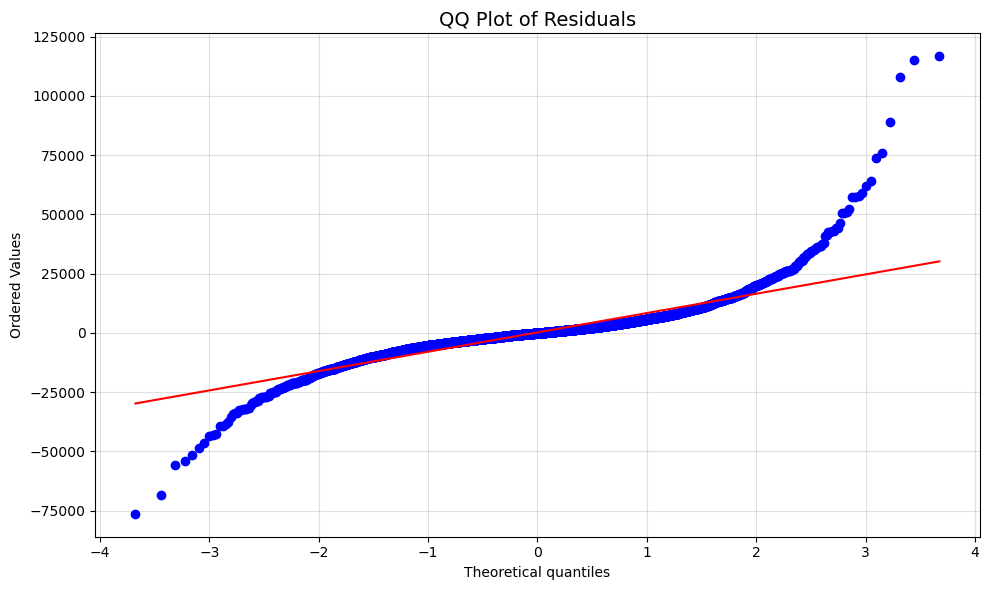

Shapiro-Wilk 檢驗統計值: 0.8249
p 值: 0.0000
殘差可能不符合正態分佈


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [99]:
import scipy.stats as stats

# 繪製QQ圖
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals", fontsize=14)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

from scipy.stats import shapiro

# 測試殘差是否符合正態分佈
stat, p = shapiro(residuals)

print(f"Shapiro-Wilk 檢驗統計值: {stat:.4f}")
print(f"p 值: {p:.4f}")

if p > 0.05:
    print("殘差可能符合正態分佈")
else:
    print("殘差可能不符合正態分佈")

In [100]:
from scipy.stats import skew, kurtosis
print(f"Skewness: {skew(residuals)}")
print(f"Kurtosis: {kurtosis(residuals)}")

Skewness: 1.6576343168434622
Kurtosis: 23.09200541343595


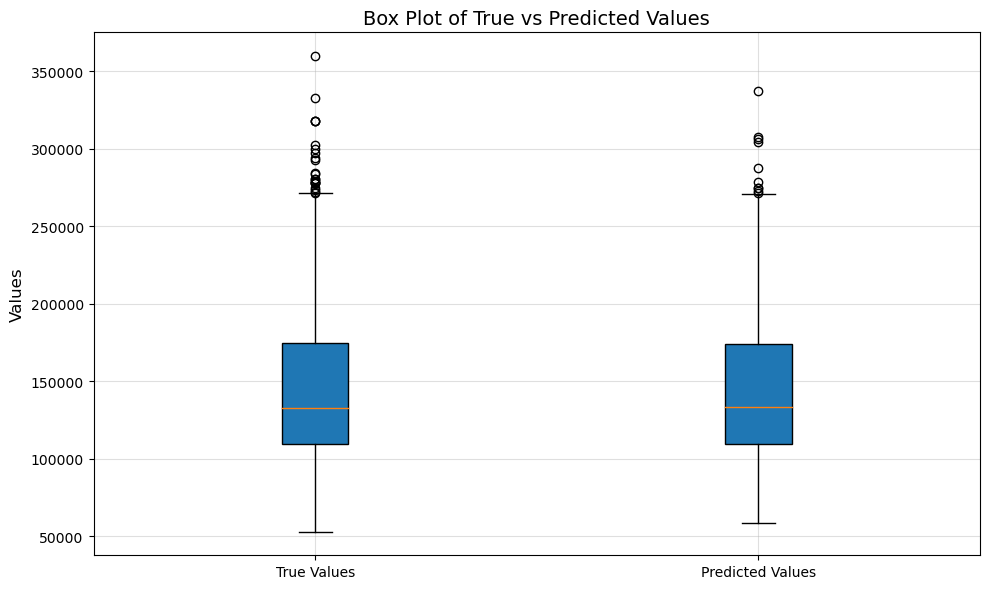

In [98]:
# 合併真實值和預測值
data_to_plot = [y_test.values, y_test_pred]
labels = ["True Values", "Predicted Values"]

# 繪製盒鬚圖
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
plt.title("Box Plot of True vs Predicted Values", fontsize=14)
plt.ylabel("Values", fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

Feature Importances:
                                              Feature  Importance
15                     Township/District_freq_squared    0.324483
0                              Township/District_freq    0.299149
1                                       Parking Price    0.079973
16                              Parking Price_squared    0.075182
12  Total Floors_Land Transfer Area (sqm)_interaction    0.028502
6     Township/District_freq_Total Floors_interaction    0.023129
13  Total Floors_Building Transfer Area (sqm)_inte...    0.018586
17                               Total Floors_squared    0.017863
2                                        Total Floors    0.017106
7   Township/District_freq_Land Transfer Area (sqm...    0.013866
8   Township/District_freq_Building Transfer Area ...    0.013686
4                        Building Transfer Area (sqm)    0.011406
9              Parking Price_Total Floors_interaction    0.011356
5    Township/District_freq_Parking Price_interaction  

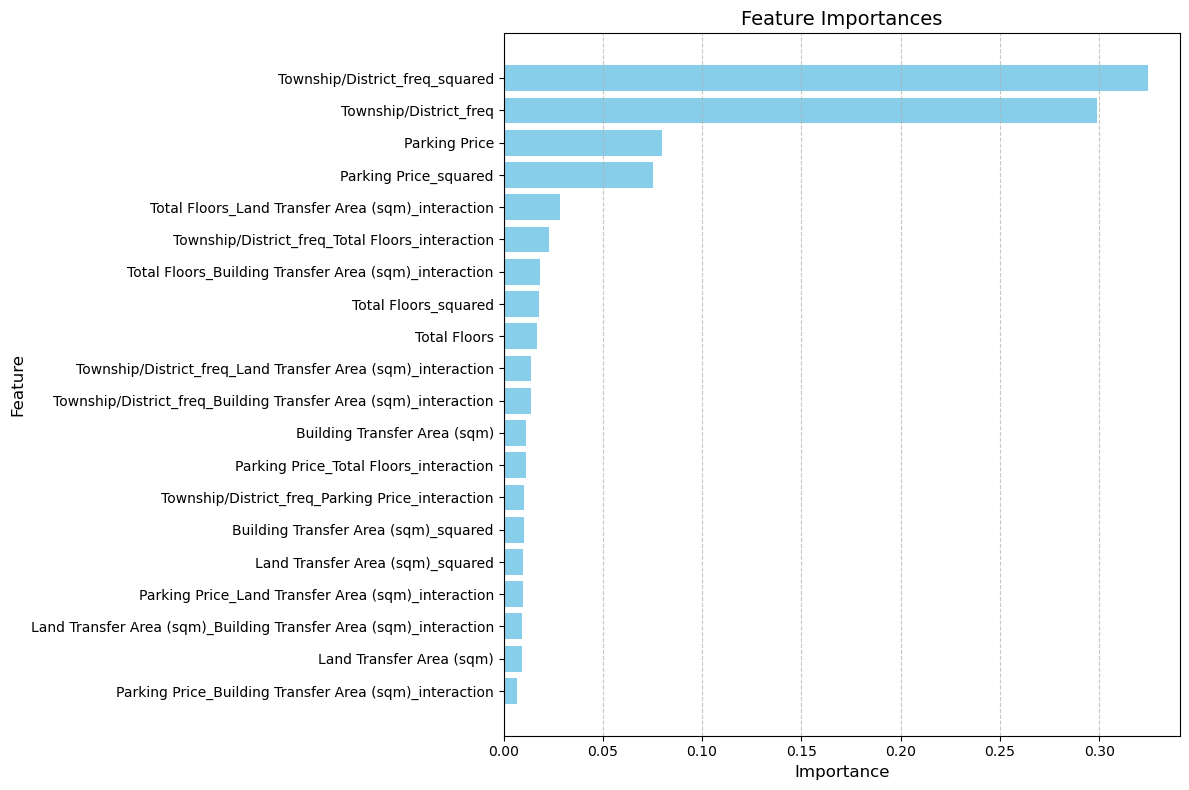

In [103]:
# 獲取所有特徵名稱
all_features = X_train_new.columns  # 使用包含交互項和平方項的所有特徵名稱

# 獲取特徵重要性
feature_importances = model.feature_importances_

# 將特徵重要性轉化為 DataFrame，方便排序和分析
importance_df = pd.DataFrame({
    'Feature': all_features,        # 使用所有特徵名稱
    'Importance': feature_importances  # 對應的重要性值
})

# 按重要性排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 顯示特徵重要性表格
print("Feature Importances:")
print(importance_df)

# 繪製特徵重要性條形圖
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.gca().invert_yaxis()  # 反轉 Y 軸，讓重要特徵排在上方
plt.grid(axis='x', linestyle='--', alpha=0.7)  # 添加網格線以提高可讀性
plt.tight_layout()
plt.show()

In [104]:
# 取出前五個最重要的特徵
top_5_features = importance_df.head(5)['Feature'].tolist()
print("前五個最重要的特徵：", top_5_features)

# 根據前五個特徵提取新數據集
X_train_top5 = X_train_new[top_5_features]
X_test_top5 = X_test_new[top_5_features]

# 創建並訓練新的隨機森林模型
model_top5 = RandomForestRegressor(random_state=42)
model_top5.fit(X_train_top5, y_train)

# 預測結果
y_train_pred_top5 = model_top5.predict(X_train_top5)
y_test_pred_top5 = model_top5.predict(X_test_top5)

# 計算 R² 和調整後的 R²
train_r2_top5 = r2_score(y_train, y_train_pred_top5)
test_r2_top5 = r2_score(y_test, y_test_pred_top5)

train_ra2_top5 = adjusted_r2(train_r2_top5, X_train_top5.shape[0], X_train_top5.shape[1])
test_ra2_top5 = adjusted_r2(test_r2_top5, X_test_top5.shape[0], X_test_top5.shape[1])

# 顯示結果
print(f"訓練集（前五個特徵）R²：{train_r2_top5:.4f}")
print(f"訓練集（前五個特徵）調整後 R²：{train_ra2_top5:.4f}")
print(f"測試集（前五個特徵）R²：{test_r2_top5:.4f}")
print(f"測試集（前五個特徵）調整後 R²：{test_ra2_top5:.4f}")

前五個最重要的特徵： ['Township/District_freq_squared', 'Township/District_freq', 'Parking Price', 'Parking Price_squared', 'Total Floors_Land Transfer Area (sqm)_interaction']
訓練集（前五個特徵）R²：0.9858
訓練集（前五個特徵）調整後 R²：0.9858
測試集（前五個特徵）R²：0.9460
測試集（前五個特徵）調整後 R²：0.9459


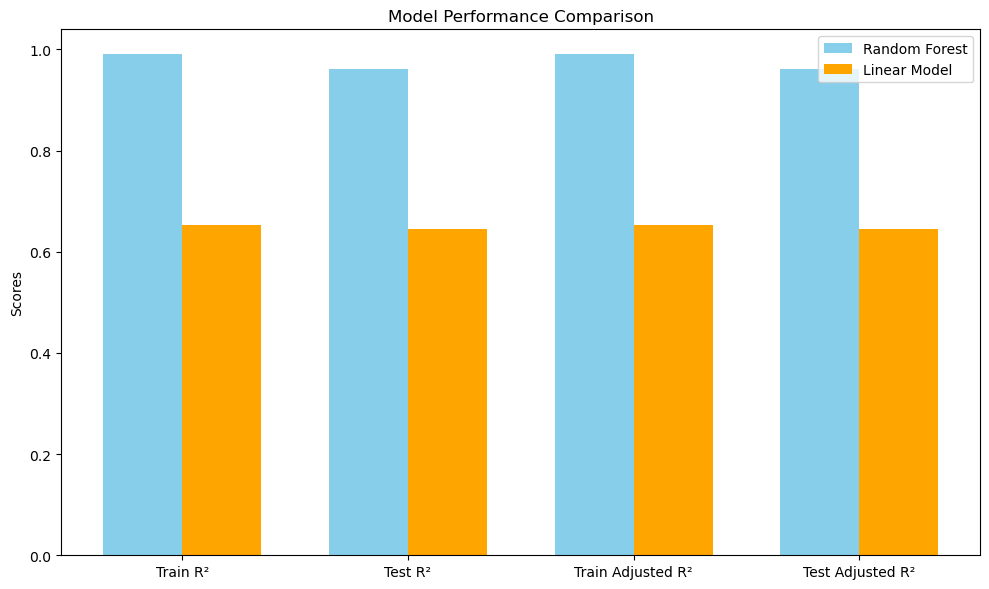

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# 模型性能數據
metrics = ['Train R²', 'Test R²', 'Train Adjusted R²', 'Test Adjusted R²']
rf_scores = [0.9901, 0.9614, 0.9901, 0.9614]
linear_scores = [0.6524, 0.6459, 0.6523, 0.6456]

# 創建柱狀圖
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rf_scores, width, label='Random Forest', color='skyblue')
plt.bar(x + width/2, linear_scores, width, label='Linear Model', color='orange')

# 添加標籤與標題
plt.xticks(x, metrics)
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()